In [1]:
!pip install numpy pandas matplotlib seaborn --quiet

In [2]:
!pip install opendatasets xgboost graphviz lightgbm --upgrade --quiet

In [5]:
!pip list | grep xgboost

xgboost                          2.1.1


In [6]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import opendatasets as od

In [7]:
od.download('https://www.kaggle.com/competitions/rossmann-store-sales')
os.listdir('rossmann-store-sales')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: glennmathews
Your Kaggle Key: ··········


100%|██████████| 6.99M/6.99M [00:00<00:00, 111MB/s]


Extracting archive ./rossmann-store-sales/rossmann-store-sales.zip to ./rossmann-store-sales


['sample_submission.csv', 'test.csv', 'store.csv', 'train.csv']

In [10]:
ross_df=pd.read_csv("./rossmann-store-sales/train.csv",low_memory=False)
store_df=pd.read_csv("./rossmann-store-sales/store.csv")
test_df=pd.read_csv("./rossmann-store-sales/test.csv")
submission_df=pd.read_csv("./rossmann-store-sales/sample_submission.csv")
ross_df.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [13]:
merged_df=ross_df.merge(store_df,how='left',on='Store')
merged_test_df=test_df.merge(store_df,how='left',on='Store')
merged_df.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         a          a                570.0   
2              1         a          a              14130.0   
3              1         c          c                620.0   
4              1         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                       11.0                    2007.0       1   
2                       12.0                    2006.0       1   
3                        9.0                    2009.0       0   
4                        4.0                    2015.0       0   

   Promo2SinceWeek  Promo2SinceYear    PromoInterval  
0              NaN              NaN              NaN  
1             13.0           2010.0  Jan,Apr,Jul,Oct  
2             14.0           2011.0  Jan,Apr,Jul,Oct  
3              NaN              NaN              NaN  
4              NaN              NaN              NaN

In [14]:
merged_test_df.head()

Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday  \
0   1      1          4  2015-09-17   1.0      1            0              0   
1   2      3          4  2015-09-17   1.0      1            0              0   
2   3      7          4  2015-09-17   1.0      1            0              0   
3   4      8          4  2015-09-17   1.0      1            0              0   
4   5      9          4  2015-09-17   1.0      1            0              0   

  StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0         c          a               1270.0                        9.0   
1         a          a              14130.0                       12.0   
2         a          c              24000.0                        4.0   
3         a          a               7520.0                       10.0   
4         a          c               2030.0                        8.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2006.0       1             14.0           2011.0   
2                    2013.0       0              NaN              NaN   
3                    2014.0       0              NaN              NaN   
4                    2000.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2              NaN  
3              NaN  
4              NaN

In [15]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [19]:
def split_date(df):
  df['Date']=pd.to_datetime(df['Date'])
  df['Day']=df.Date.dt.day
  df['Month']=df.Date.dt.month
  df['Year']=df.Date.dt.year
  df['WeekOfYear']=df.Date.dt.isocalendar().week
split_date(merged_df)
split_date(merged_test_df)

In [21]:
merged_df.head(2)

Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   

   SchoolHoliday StoreType  ... CompetitionOpenSinceMonth  \
0              1         c  ...                       9.0   
1              1         a  ...                      11.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   

     PromoInterval  Day Month  Year  WeekOfYear  
0              NaN   31     7  2015          31  
1  Jan,Apr,Jul,Oct   31     7  2015          31  

[2 rows x 22 columns]

In [22]:
merged_df[merged_df.Open==0].Sales.value_counts()

Sales
0    172817
Name: count, dtype: int64

In [23]:
merged_df=merged_df[merged_df.Open==1].copy()
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 844392 entries, 0 to 1017190
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844392 non-null  int64         
 1   DayOfWeek                  844392 non-null  int64         
 2   Date                       844392 non-null  datetime64[ns]
 3   Sales                      844392 non-null  int64         
 4   Customers                  844392 non-null  int64         
 5   Open                       844392 non-null  int64         
 6   Promo                      844392 non-null  int64         
 7   StateHoliday               844392 non-null  object        
 8   SchoolHoliday              844392 non-null  int64         
 9   StoreType                  844392 non-null  object        
 10  Assortment                 844392 non-null  object        
 11  CompetitionDistance        842206 non-null  float64     

In [27]:
def comp_months(df):
  df['CompetitionOpen']=12*(df.Year-df.CompetitionOpenSinceYear)+(df.Month-df.CompetitionOpenSinceMonth)
  df['CompetitionOpen']=df['CompetitionOpen'].map(lambda x:0 if x<0 else x).fillna(0)
comp_months(merged_df)
comp_months(merged_test_df)
merged_df.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   
2      3          5 2015-07-31   8314        821     1      1            0   
3      4          5 2015-07-31  13995       1498     1      1            0   
4      5          5 2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType  ... CompetitionOpenSinceYear  Promo2  \
0              1         c  ...                   2008.0       0   
1              1         a  ...                   2007.0       1   
2              1         a  ...                   2006.0       1   
3              1         c  ...                   2009.0       0   
4              1         a  ...                   2015.0       0   

   Promo2SinceWeek  Promo2SinceYear    PromoInterval  Day  Month  Year  \
0              NaN              NaN              NaN   31      7  2015   
1             13.0           2010.0  Jan,Apr,Jul,Oct   31      7  2015   
2             14.0           2011.0  Jan,Apr,Jul,Oct   31      7  2015   
3              NaN              NaN              NaN   31      7  2015   
4              NaN              NaN              NaN   31      7  2015   

   WeekOfYear  CompetitionOpen  
0          31             82.0  
1          31             92.0  
2          31            103.0  
3          31             70.0  
4          31              3.0  

[5 rows x 23 columns]

In [36]:
def check_promo_month(row):
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        months = (row['PromoInterval'] or '').split(',')
        if row['Promo2Open'] and month2str[row['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0
def promo_cols(df):
    df['Promo2Open'] = 12*(df.Year - df.Promo2SinceYear) +  (df.WeekOfYear - df.Promo2SinceWeek) * 7/30.5
    df['Promo2Open'] = df['Promo2Open'].fillna(0).map(lambda x:0 if x<0 else x)
    df['Promo2Open'] = df['Promo2Open']*df['Promo2']
    df['IsPromo2Month'] = df.apply(check_promo_month, axis=1) * df['Promo2']

promo_cols(merged_df)
promo_cols(merged_test_df)
merged_df[['Date', 'Promo2', 'Promo2SinceYear', 'Promo2SinceWeek', 'PromoInterval', 'Promo2Open', 'IsPromo2Month']].head(5)

Date  Promo2  Promo2SinceYear  Promo2SinceWeek    PromoInterval  \
0 2015-07-31       0              NaN              NaN              NaN   
1 2015-07-31       1           2010.0             13.0  Jan,Apr,Jul,Oct   
2 2015-07-31       1           2011.0             14.0  Jan,Apr,Jul,Oct   
3 2015-07-31       0              NaN              NaN              NaN   
4 2015-07-31       0              NaN              NaN              NaN   

   Promo2Open  IsPromo2Month  
0    0.000000              0  
1   64.131148              1  
2   51.901639              1  
3    0.000000              0  
4    0.000000              0

In [37]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year',
       'WeekOfYear', 'CompetitionOpen', 'Promo2Open', 'IsPromo2Month'],
      dtype='object')

In [40]:
input_cols=['Store', 'DayOfWeek', 'Promo','StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment','CompetitionDistance', 'Promo2',
            'Day', 'Month', 'Year','WeekOfYear', 'CompetitionOpen', 'Promo2Open', 'IsPromo2Month']
target_col='Sales'
inputs=merged_df[input_cols].copy()
target=merged_df[target_col].copy()
inputs.head()

Store  DayOfWeek  Promo StateHoliday  SchoolHoliday StoreType Assortment  \
0      1          5      1            0              1         c          a   
1      2          5      1            0              1         a          a   
2      3          5      1            0              1         a          a   
3      4          5      1            0              1         c          c   
4      5          5      1            0              1         a          a   

   CompetitionDistance  Promo2  Day  Month  Year  WeekOfYear  CompetitionOpen  \
0               1270.0       0   31      7  2015          31             82.0   
1                570.0       1   31      7  2015          31             92.0   
2              14130.0       1   31      7  2015          31            103.0   
3                620.0       0   31      7  2015          31             70.0   
4              29910.0       0   31      7  2015          31              3.0   

   Promo2Open  IsPromo2Month  
0    0.000000              0  
1   64.131148              1  
2   51.901639              1  
3    0.000000              0  
4    0.000000              0

In [42]:
test_inputs=merged_test_df[input_cols].copy()
test_inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Store                41088 non-null  int64  
 1   DayOfWeek            41088 non-null  int64  
 2   Promo                41088 non-null  int64  
 3   StateHoliday         41088 non-null  object 
 4   SchoolHoliday        41088 non-null  int64  
 5   StoreType            41088 non-null  object 
 6   Assortment           41088 non-null  object 
 7   CompetitionDistance  40992 non-null  float64
 8   Promo2               41088 non-null  int64  
 9   Day                  41088 non-null  int32  
 10  Month                41088 non-null  int32  
 11  Year                 41088 non-null  int32  
 12  WeekOfYear           41088 non-null  UInt32 
 13  CompetitionOpen      41088 non-null  float64
 14  Promo2Open           41088 non-null  float64
 15  IsPromo2Month        41088 non-null 

In [43]:
numeric_cols = ['Store', 'Promo', 'SchoolHoliday',
              'CompetitionDistance', 'CompetitionOpen', 'Promo2', 'Promo2Open', 'IsPromo2Month',
              'Day', 'Month', 'Year', 'WeekOfYear',  ]
categorical_cols = ['DayOfWeek', 'StateHoliday', 'StoreType', 'Assortment']
inputs[numeric_cols].isna().sum()

Store                     0
Promo                     0
SchoolHoliday             0
CompetitionDistance    2186
CompetitionOpen           0
Promo2                    0
Promo2Open                0
IsPromo2Month             0
Day                       0
Month                     0
Year                      0
WeekOfYear                0
dtype: int64

In [44]:
test_inputs[numeric_cols].isna().sum()

Store                   0
Promo                   0
SchoolHoliday           0
CompetitionDistance    96
CompetitionOpen         0
Promo2                  0
Promo2Open              0
IsPromo2Month           0
Day                     0
Month                   0
Year                    0
WeekOfYear              0
dtype: int64

In [46]:
max_distance=inputs.CompetitionDistance.max()
max_distance

75860.0

In [47]:
inputs['CompetitionDistance'].fillna(max_distance,inplace=True)
test_inputs['CompetitionDistance'].fillna(max_distance,inplace=True)

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler().fit(inputs[numeric_cols])
inputs[numeric_cols]=scaler.transform(inputs[numeric_cols])
test_inputs[numeric_cols]=scaler.transform(test_inputs[numeric_cols])

In [52]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore').fit(inputs[categorical_cols])
encoded_cols=list(encoder.get_feature_names_out(categorical_cols))
inputs[encoded_cols]=encoder.transform(inputs[categorical_cols])
test_inputs[encoded_cols]=encoder.transform(test_inputs[categorical_cols])


In [54]:
x=inputs[numeric_cols+encoded_cols]
x_test=test_inputs[numeric_cols+encoded_cols]

In [55]:
from xgboost import XGBRegressor
model=XGBRegressor(random_state=7,n_jobs=-1,n_estimators=20,max_depth=4).fit(x,target)

In [59]:
preds=model.predict(x)
print(preds)
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(preds,target,squared=False)
rmse

[ 7960.1133  7581.974   7993.401  ...  7101.1714  8794.572  10820.442 ]


2397.1614431476673

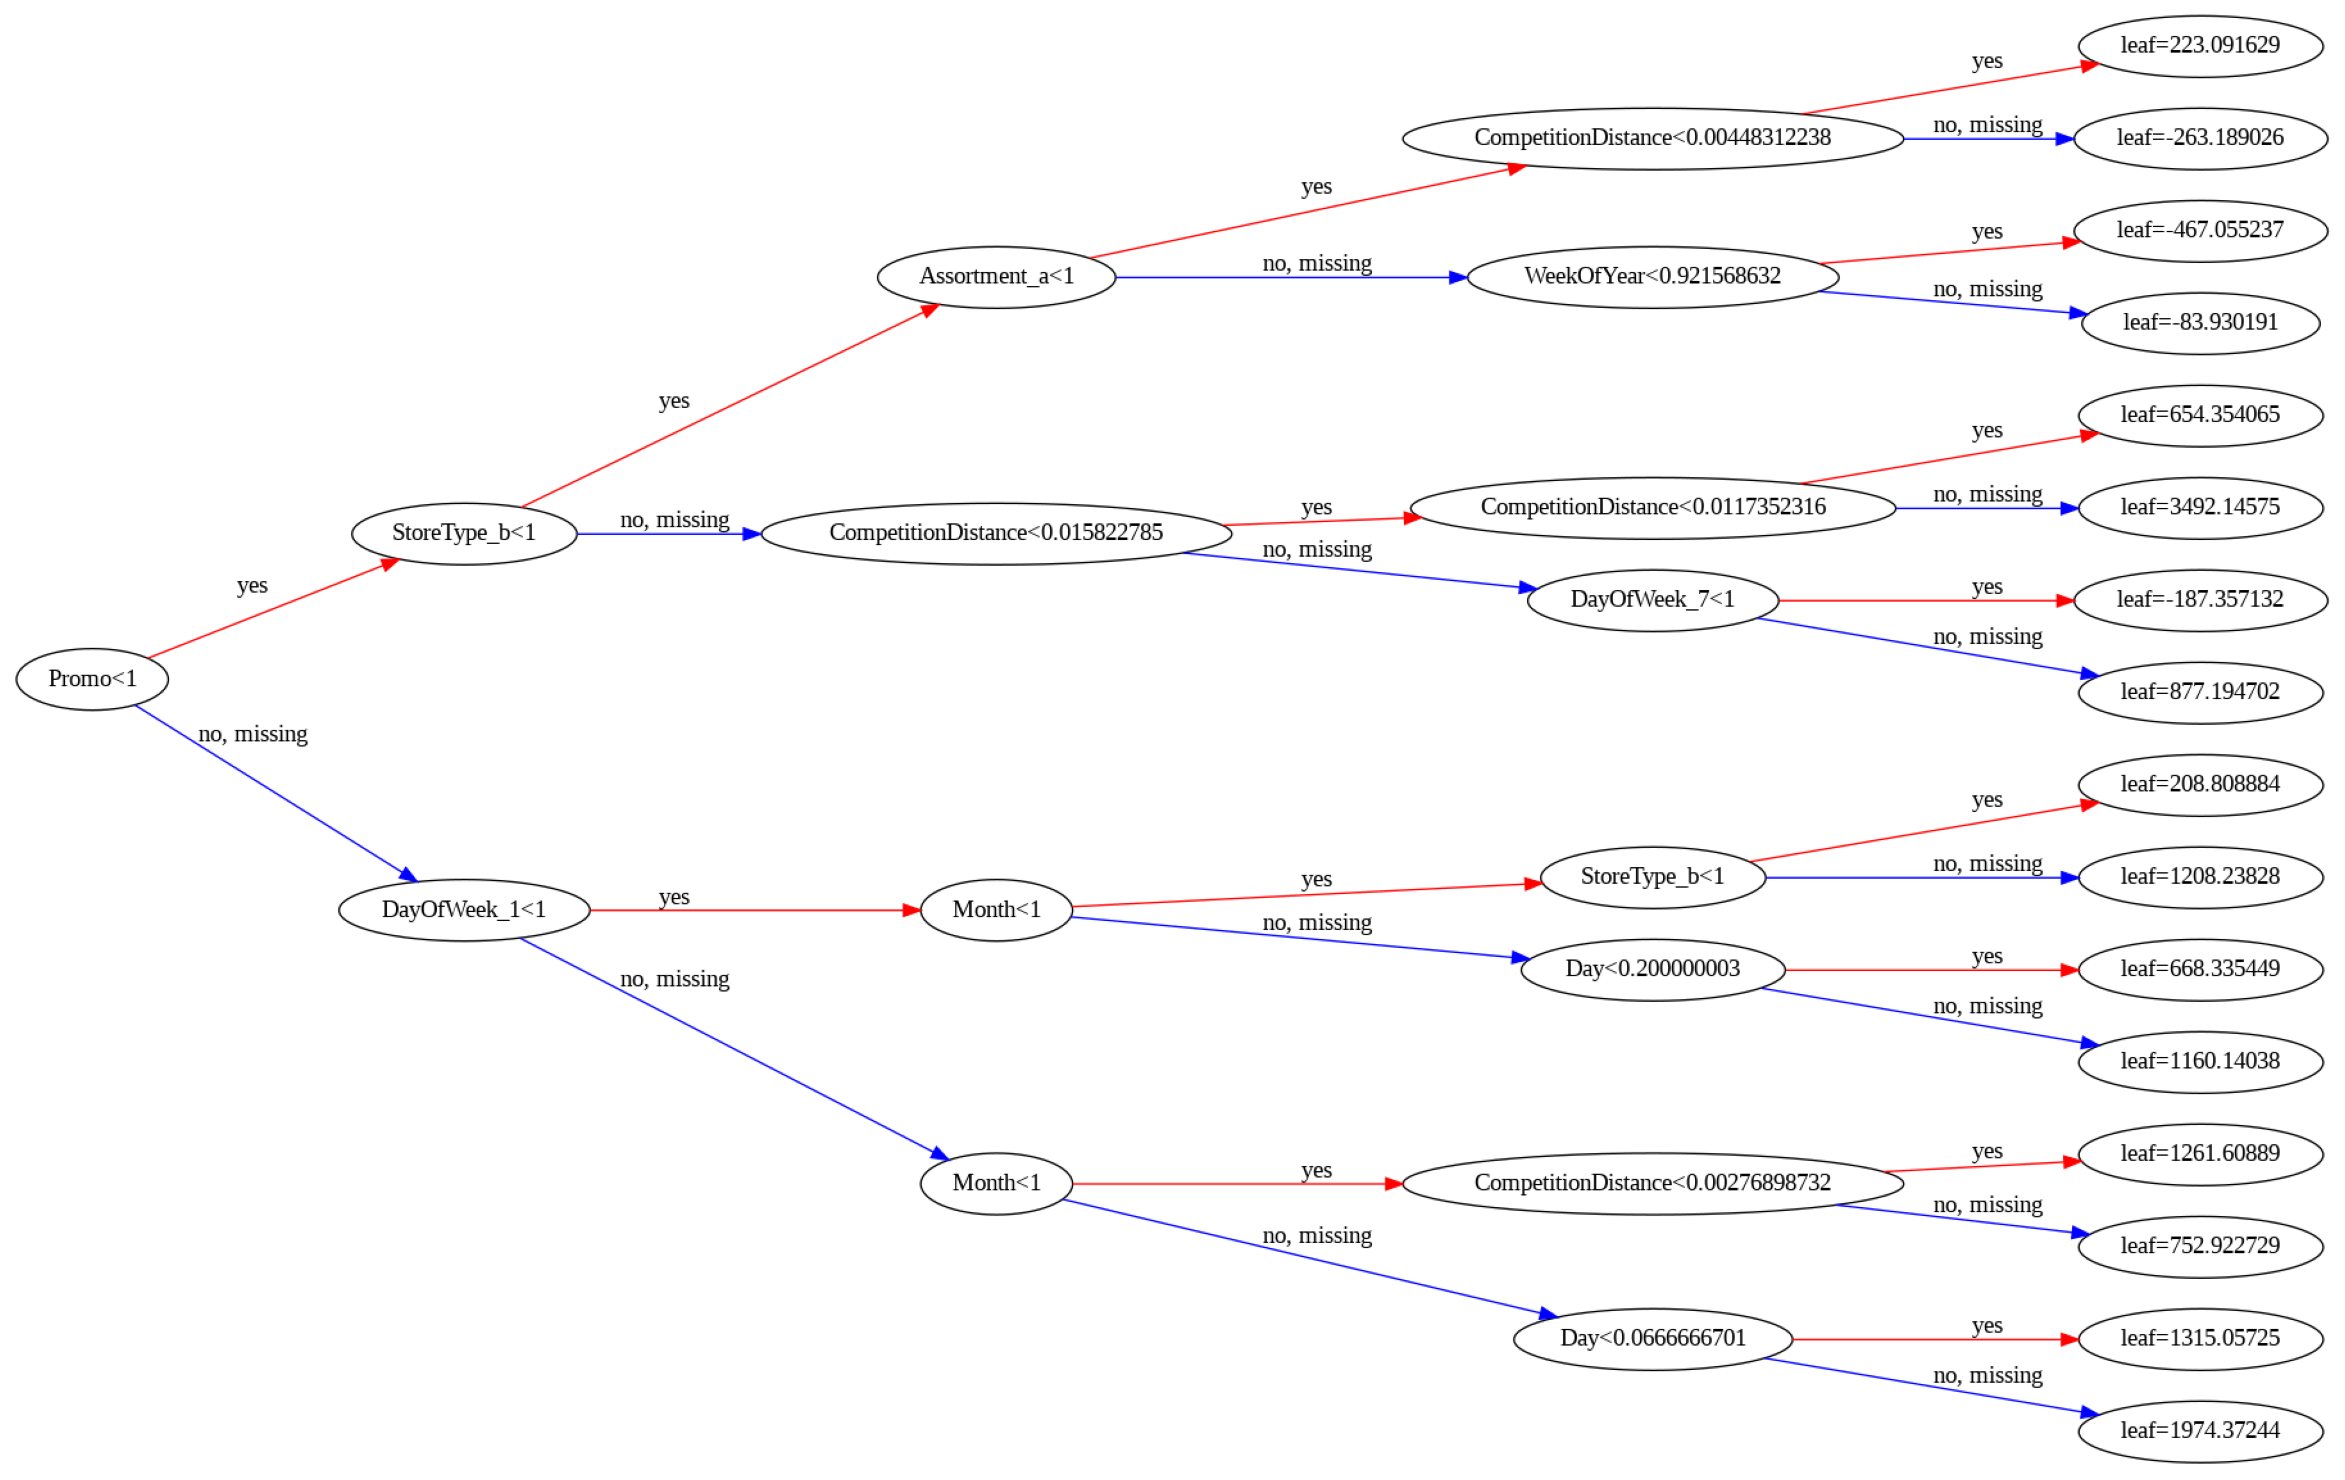

In [61]:
from xgboost import plot_tree
from matplotlib import rcParams
%matplotlib inline
rcParams['figure.figsize']=30,30
plot_tree(model,rankdir='LR',num_trees=0);    #the 0th tree(estimator) that is run.

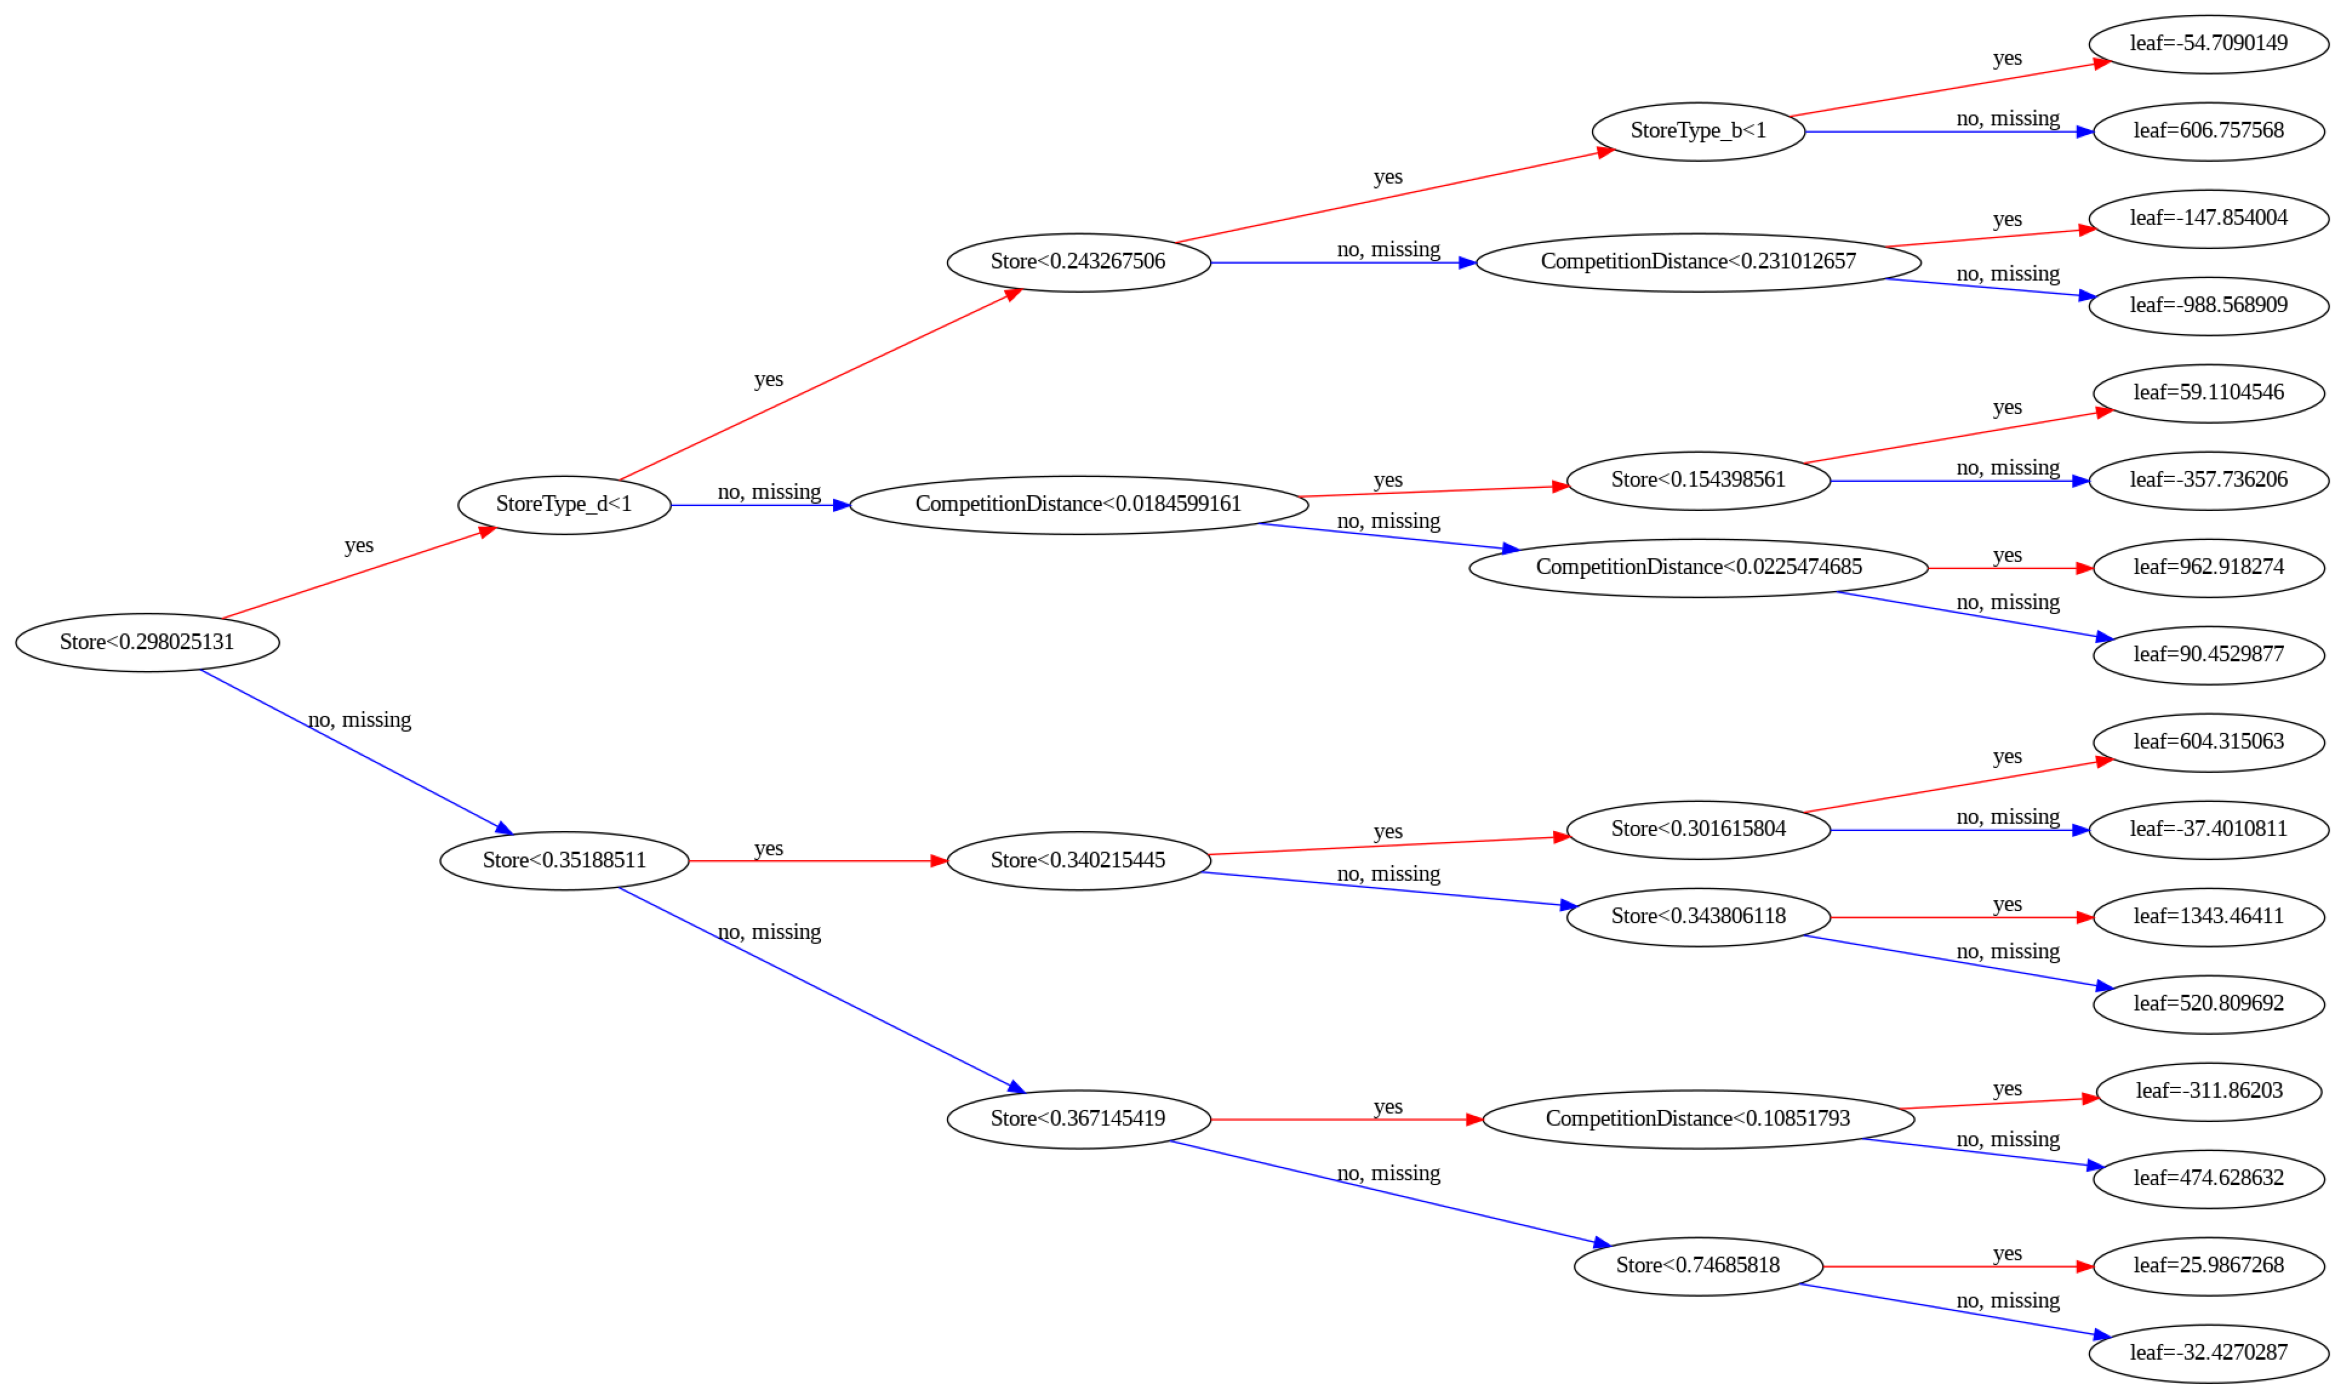

In [63]:
plot_tree(model,rankdir='LR',num_trees=19);

In [65]:
pd.DataFrame({'feature':x.columns,'importance':model.feature_importances_}).sort_values('importance',ascending=False)

feature  importance
1                 Promo    0.334846
12          DayOfWeek_1    0.076257
24          StoreType_b    0.069301
5                Promo2    0.052821
26          StoreType_d    0.051002
9                 Month    0.036114
27         Assortment_a    0.034672
11           WeekOfYear    0.034646
29         Assortment_c    0.034157
3   CompetitionDistance    0.030939
23          StoreType_a    0.029402
2         SchoolHoliday    0.028956
0                 Store    0.025494
8                   Day    0.025494
13          DayOfWeek_2    0.022003
18          DayOfWeek_7    0.021887
6            Promo2Open    0.020863
16          DayOfWeek_5    0.016021
10                 Year    0.011580
4       CompetitionOpen    0.010291
17          DayOfWeek_6    0.008662
25          StoreType_c    0.008121
14          DayOfWeek_3    0.006147
7         IsPromo2Month    0.005869
19       StateHoliday_0    0.004454
28         Assortment_b    0.000000
21       StateHoliday_b    0.000000
22       StateHoliday_c    0.000000
20       StateHoliday_a    0.000000
15          DayOfWeek_4    0.000000

Implementing K-fold validation :-

In [68]:
from sklearn.model_selection import KFold
def train_and_evaluation(x_train,train_targets,x_val,val_targets,**params):
  model=XGBRegressor(random_state=7,n_jobs=-1,**params).fit(x_train,train_targets)
  preds=model.predict(x_train)
  val_preds=model.predict(x_val)
  train_rmse=mean_squared_error(preds,train_targets,squared=False)
  val_rmse=mean_squared_error(val_preds,val_targets,squared=False)
  return model , train_rmse , val_rmse

In [70]:
kfold=KFold(n_splits=5)
models=[]
for train_index,val_index in kfold.split(x):
  x_train,train_targets=x.iloc[train_index],target.iloc[train_index]
  x_val,val_targets=x.iloc[val_index],target.iloc[val_index]
  model,train_rmse,val_rmse=train_and_evaluation(x_train,train_targets,x_val,val_targets,max_depth=4,n_estimators=20)
  models.append(model)
  print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse,val_rmse))

Train RMSE: 2394.7876402581237, Validation RMSE: 2462.850314220323
Train RMSE: 2401.1582743064164, Validation RMSE: 2449.841681576792
Train RMSE: 2411.8926798093644, Validation RMSE: 2391.5910868526794
Train RMSE: 2344.831637340392, Validation RMSE: 2440.0443213469284
Train RMSE: 2391.1546155860246, Validation RMSE: 2460.8741743196815


In [73]:
def pred_avg(models,inputs):
  return np.mean([model.predict(inputs) for model in models],axis=0)
preds=pred_avg(models,x)
print(preds)

[8031.8696 7536.164  8671.131  ... 7181.968  7955.146  9629.75  ]


In [76]:
#kfold is meant for smaller datasets, so here not necessary. SO creating validation set as such:
from sklearn.model_selection import train_test_split
x_train,x_val,train_targets,val_targets=train_test_split(x,target,test_size=0.1)
def test_params(**params):
  model=XGBRegressor(random_state=7,n_jobs=-1,**params).fit(x_train,train_targets)
  preds=model.predict(x_train)
  val_preds=model.predict(x_val)
  train_rmse=mean_squared_error(preds,train_targets,squared=False)
  val_rmse=mean_squared_error(val_preds,val_targets,squared=False)
  print(train_rmse , val_rmse)

In [77]:
test_params(n_estimators=15)

2246.456126851995 2254.934866273119


In [78]:
test_params(n_estimators=50)

1540.5732936863487 1553.3104169457142


In [79]:
test_params(n_estimators=120)

1090.3873967252061 1106.170467281907


In [80]:
test_params(max_depth=2,n_estimators=10)

2687.0105950084576 2689.9981193231865


In [81]:
test_params(max_depth=12)

517.8835000486561 751.9308190161614


In [82]:
test_params(learning_rate=0.3)

1172.7681743406222 1187.375351297752


In [83]:
test_params(learning_rate=0.5)

1007.3518814055553 1028.6475678055965


In [98]:
final_model=XGBRegressor(random_state=7,n_jobs=-1,learning_rate=0.5,max_depth=12).fit(x_train,train_targets)
preds=final_model.predict(x_train)
val_preds=final_model.predict(x_val)
b=mean_squared_error(val_preds,val_targets,squared=False)
a=mean_squared_error(preds,train_targets,squared=False)
print(a , b)

443.1207963542597 763.3479356552946


In [101]:
final_model=XGBRegressor(random_state=7,n_jobs=-1,learning_rate=0.3,max_depth=12,n_estimators=500,subsample=0.9,colsample_bytree=0.7).fit(x,target)
pred=final_model.predict(x_test)
pred

array([ 4382.1797,  8354.689 ,  9109.526 , ...,  6746.816 , 22360.232 ,
        6910.803 ], dtype=float32)

In [102]:
submission_df.head(2)

Id        Sales
0   1  6443.808594
1   2  8101.201660

In [103]:
submission_df['Sales']=pred
submission_df.head()

Id        Sales
0   1  4382.179688
1   2  8354.689453
2   3  9109.526367
3   4  6857.849609
4   5  6909.129395

In [104]:
submission_df['Sales']=pred * test_df.Open.fillna(1)
submission_df

Id         Sales
0          1   4382.179688
1          2   8354.689453
2          3   9109.526367
3          4   6857.849609
4          5   6909.129395
...      ...           ...
41083  41084   2622.934326
41084  41085   6458.240234
41085  41086   6746.815918
41086  41087  22360.232422
41087  41088   6910.803223

[41088 rows x 2 columns]

In [105]:
submission_df.to_csv('submission.csv',index=None)

In [109]:
final_model.get_xgb_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.7,
 'device': None,
 'eval_metric': None,
 'gamma': None,
 'grow_policy': None,
 'interaction_constraints': None,
 'learning_rate': 0.3,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 12,
 'max_leaves': None,
 'min_child_weight': None,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': 7,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 0.9,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}